## Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## load data

In [3]:
data = pd.read_csv('train-io.txt',header=None, delimiter=r"\s+" )
testdata = pd.read_csv('test-i.txt',header=None, delimiter=r"\s+" )

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.755260,0.130493,3.94066,0.575958,-3.07717,1.772130,-1.124320,-3.15380,2.371220,-2.752850,0
1,2.124190,-1.272880,1.19663,0.554622,-2.48804,0.578238,0.564368,-2.88063,-0.613447,-0.269964,1
2,0.762264,-0.946171,2.08249,0.723713,-1.85893,0.448780,-0.093424,-0.57777,0.423647,0.077900,1
3,3.720380,0.179464,2.33424,-0.132556,-2.99788,0.045012,-0.403001,-2.24686,0.910226,-0.014559,1
4,4.389430,-0.884852,2.97928,-0.040887,-4.25749,1.564560,-0.312435,-5.11924,0.768608,-2.495500,1


## Extract input and output features

In [5]:
testx = testdata.iloc[:,0 :].values
X = data.iloc[:,:-1].values
y = data.iloc[:,10].values
print(testx[0])
print(X.shape)
print(y.shape)

[ 2.93457   -1.19533    1.61763    0.0158258 -3.21903    0.929525
  0.517711  -4.48407   -0.399851  -0.812972 ]
(100000, 10)
(100000,)


## Visualize target labels

C:\Users\Eugenio\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

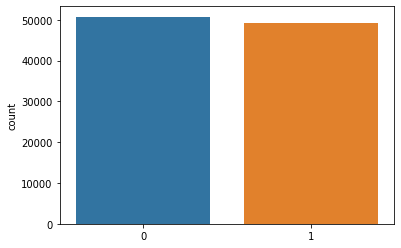

In [6]:
import seaborn as sns
sns.countplot(y)

## Train-test split for model training

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Neural Network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, input_shape=(10,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [9]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=400, batch_size=10)

Epoch 1/400
8000/8000 [==============================] - 7s 837us/step - loss: 0.6959 - accuracy: 0.5079
Epoch 2/400
8000/8000 [==============================] - 8s 962us/step - loss: 0.6932 - accuracy: 0.5068
Epoch 3/400
8000/8000 [==============================] - 8s 979us/step - loss: 0.6928 - accuracy: 0.5086
Epoch 4/400
 152/8000 [..............................] - ETA: 7s - loss: 0.6945 - accuracy: 0.4819

In [23]:
model.save('model2.h5')

In [10]:
# evaluate the keras model again
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

625/625 [==============================] - 1s 628us/step - loss: 0.6964 - accuracy: 0.4980
Accuracy: 49.29


# load model

In [11]:
from keras.models import load_model
model1 = load_model('model2.h5') 
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 35,841
Trainable params: 35,841
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


## Get prediction from model

In [12]:
from sklearn.metrics import accuracy_score
# evaluate the keras model again
pred = model1.predict(X_test)
testpred = model1.predict(testx)


## process prediction

In [13]:
new = []
testnew = []
for i in range(len(pred)):
  if pred[i] >= 0.5:
    new.append(1)
  else:
    new.append(0)
    
for i in range(len(testpred)):
  if testpred[i] >= 0.5:
    testnew.append(1)
  else:
    testnew.append(0)
    


[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 

In [16]:
#Creating the test-o.txt 
testo = open("test-o.txt", "w")
for row in testnew:
    np.savetxt(testo, testnew, delimiter=',', fmt="%i")

testo.close()

In [ ]:

accuracy = accuracy_score(new,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Function for evaluating model

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name, classes):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions, target_names = classes))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True,yticklabels=classes, xticklabels=classes, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()

In [ ]:
modelEvaluation(new,y_test,'Neural Network', ['0','1'])